### Carregando pacotes e definindo configurações

In [26]:
# linear algebra
import numpy as np 
# data processing
import pandas as pd 
# Pandas profilling
from pandas_profiling import ProfileReport
## Graphs
import seaborn as sns
## easier graphs
from plotnine import *
## train test split
from sklearn.model_selection import train_test_split
## Logistic regression
from sklearn.linear_model import LogisticRegression
## Knn
from sklearn.neighbors import KNeighborsClassifier
## scaler
from sklearn.preprocessing import MinMaxScaler
## Decision tree
from sklearn import tree
## Metrics of the model
from sklearn import metrics

In [2]:
## Definig some configurations
pd.set_option('display.max_columns', None) ## Show All columns
%matplotlib inline
#pd.set_option('display.float_format', lambda x: '%.3f' % x) ## Defining the number of floats to show

### Read the Data

In [3]:
titanic = pd.read_csv("data/train.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Data understanding

In [4]:
## criando o profilling
profile = ProfileReport(titanic, title="Perfil do banco Titanic",vars={"num": {"low_categorical_threshold": 0}})

In [ ]:
## mostrando o profilling
#profile.to_widgets()
##profile.to_file("perfilTitnic.html")

<AxesSubplot:xlabel='Survived', ylabel='Age'>

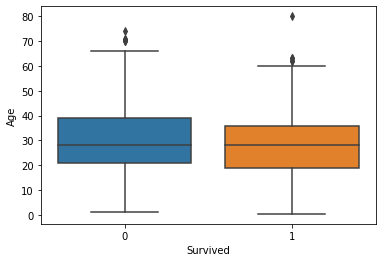

In [5]:
sns.boxplot(data = titanic, x ='Survived', y = 'Age' )


<AxesSubplot:xlabel='Survived', ylabel='Fare'>

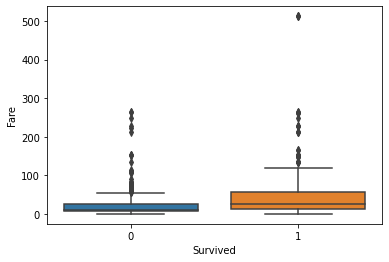

In [6]:
sns.boxplot(data = titanic, x ='Survived', y = 'Fare' )

<AxesSubplot:xlabel='Survived', ylabel='SibSp'>

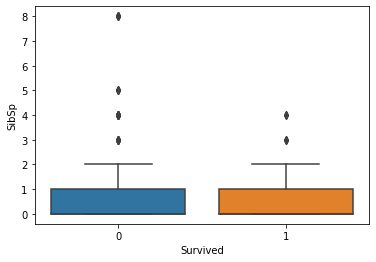

In [7]:
sns.boxplot(data = titanic, x ='Survived', y = 'SibSp' )

In [ ]:
sns.boxplot(data = titanic, x ='Survived', y = 'Parch' )

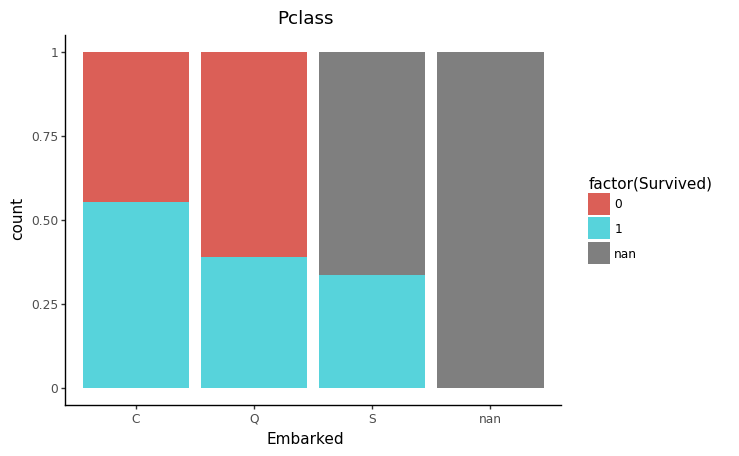

<ggplot: (188925463188)>

In [8]:
(ggplot(titanic, aes(fill = 'factor(Survived)', x = "Embarked"))
+ geom_bar(position='fill')
##+ scale_fill_manual(values=cores)
+ theme_classic()
+ labs( title = "Pclass")
)


In [ ]:
(ggplot(titanic, aes(fill = 'factor(Survived)', x = "factor(Sex)"))
+ geom_bar(position='fill')
#+scale_fill_manual(values=cores)
+ theme_classic()
+ labs( title = "Sex")
)

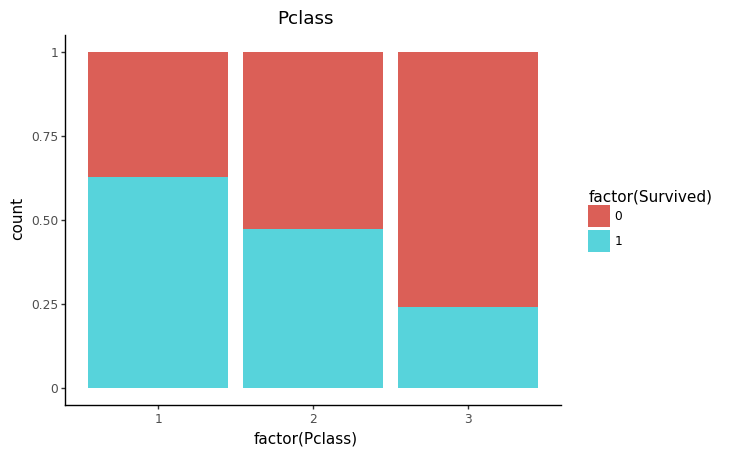

<ggplot: (188925704602)>

In [9]:
(ggplot(titanic, aes(fill = 'factor(Survived)', x = "factor(Pclass)"))
+ geom_bar(position='fill')
#+scale_fill_manual(values=cores)
+ theme_classic()
+ labs( title = "Pclass")
)

C:\Users\DPCDTI\AppData\Roaming\Python\Python38\site-packages\plotnine\layer.py:334: PlotnineWarning: stat_boxplot : Removed 177 rows containing non-finite values.


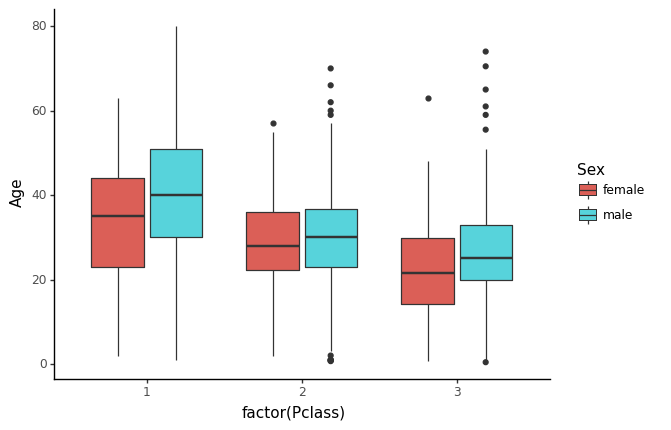

<ggplot: (188925557989)>

In [11]:
(
ggplot(titanic, aes(x = 'factor(Pclass)', y = 'Age' , fill ='Sex'  ))
+ geom_boxplot()
+ theme_classic()
)

In [12]:
idades = titanic[['Pclass','Age','Sex']].groupby(by = ['Pclass','Sex']).agg(n=pd.NamedAgg(column='Age', aggfunc='count'),
mediana=pd.NamedAgg(column='Age', aggfunc='median'))
idades

n  mediana
Pclass Sex                 
1      female   85     35.0
       male    101     40.0
2      female   74     28.0
       male     99     30.0
3      female  102     21.5
       male    253     25.0

In [14]:
idades2 = titanic[['Pclass','Age','Sex']].groupby(by = ['Pclass','Sex']).median()
idades2 = pd.Series(idades2['Age'])
idades2 


Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

### Data preparation

In [15]:
## input age
idades2 = titanic[['Pclass','Age','Sex']].groupby(by = ['Pclass','Sex']).median()
idades2 = pd.Series(idades2['Age'])
#titanic['ageteste'] = titanic['Age']
titanic.set_index(['Pclass','Sex'], inplace=True)
titanic['Age'] = titanic['Age'].fillna(idades2)
titanic.reset_index(inplace=True)
titanic

,Pclass,Sex,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,female,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C
2,3,female,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,female,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S
4,3,male,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,male,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S
887,1,female,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S
888,3,female,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",21.5,1,2,W./C. 6607,23.4500,NaN,S
889,1,male,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C


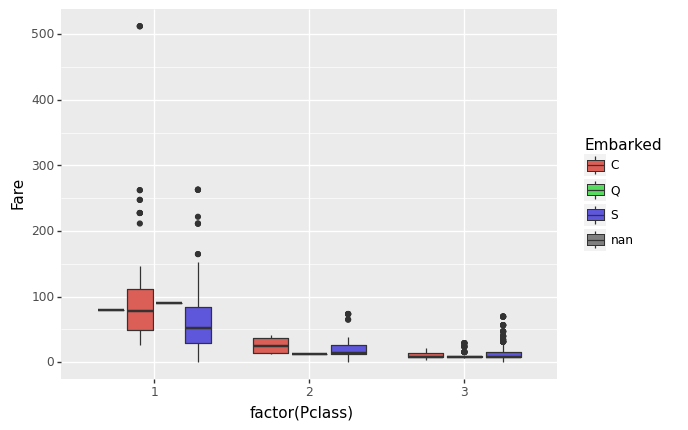

<ggplot: (188925764831)>

In [16]:
## Entendendo o local do embarque para poder imputar

(
ggplot(titanic, aes(x = 'factor(Pclass)', y = 'Fare' , fill ='Embarked'  ))
+ geom_boxplot()

)

In [17]:
idades = titanic[['Pclass','Fare','Embarked']].groupby(by = ['Pclass','Embarked']).agg(
    n=pd.NamedAgg(column='Fare', aggfunc='count'),
    mediana=pd.NamedAgg(column='Fare', aggfunc='median'),
    media=pd.NamedAgg(column='Fare', aggfunc='mean'),
    min=pd.NamedAgg(column='Fare', aggfunc='min'),
    max=pd.NamedAgg(column='Fare', aggfunc='max')
    )
idades

n  mediana       media      min       max
Pclass Embarked                                             
1      C          85  78.2667  104.718529  26.5500  512.3292
       Q           2  90.0000   90.000000  90.0000   90.0000
       S         127  52.0000   70.364862   0.0000  263.0000
2      C          17  24.0000   25.358335  12.0000   41.5792
       Q           3  12.3500   12.350000  12.3500   12.3500
       S         164  13.5000   20.327439   0.0000   73.5000
3      C          66   7.8958   11.214083   4.0125   22.3583
       Q          72   7.7500   11.183393   6.7500   29.1250
       S         353   8.0500   14.644083   0.0000   69.5500

In [22]:
## As duas pessoas qque falta a infomração de ondem embarcaram, viajaram naprimeira clase e pagaram 80. 
## de acordo com a análise feita,decidimos por inputar 'C'

titanic['Embarked'] = titanic['Embarked'].fillna('C')
titanic.head()


,Pclass,Sex,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,female,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C
2,3,female,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,female,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S
4,3,male,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S


In [24]:
### Excluindo colunas desnecessárias
titanic.drop(['PassengerId','Name','Cabin', 'Ticket'], axis= 1, inplace= True)
titanic.head()


,Pclass,Sex,Survived,Age,SibSp,Parch,Fare,Embarked
0,3,male,0,22.0,1,0,7.2500,S
1,1,female,1,38.0,1,0,71.2833,C
2,3,female,1,26.0,0,0,7.9250,S
3,1,female,1,35.0,1,0,53.1000,S
4,3,male,0,35.0,0,0,8.0500,S


In [25]:
titanic = pd.get_dummies(data= titanic, columns= ['Pclass','Sex','Embarked'], drop_first= True)
titanic.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


In [28]:
scaler = MinMaxScaler()
col = ['Age','Fare','SibSp','Parch']
titanic[col] = scaler.fit_transform(titanic[col])
titanic

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0.0,0.271174,0.125,0.000000,0.014151,0.0,1.0,1.0,0.0,1.0
1,1.0,0.472229,0.125,0.000000,0.139136,0.0,0.0,0.0,0.0,0.0
2,1.0,0.321438,0.000,0.000000,0.015469,0.0,1.0,0.0,0.0,1.0
3,1.0,0.434531,0.125,0.000000,0.103644,0.0,0.0,0.0,0.0,1.0
4,0.0,0.434531,0.000,0.000000,0.015713,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.334004,0.000,0.000000,0.025374,1.0,0.0,1.0,0.0,1.0
887,1.0,0.233476,0.000,0.000000,0.058556,0.0,0.0,0.0,0.0,1.0
888,0.0,0.264891,0.125,0.333333,0.045771,0.0,1.0,0.0,0.0,1.0
889,1.0,0.321438,0.000,0.000000,0.058556,0.0,0.0,1.0,0.0,0.0
